#  Fraud Detection Using Exploratory Data Analysis and Predictive Machine Learning

Lots of financial losses are caused every year due to fraud transactions, the financial industry has switched from a physical investigative approach to data driven investigative approach with the design of fraud detection algorithms to warn and help fraud investigators.

This project is focused to give you an idea of applying Exploratory Data Analysis (EDA) in a real business scenario. In this project, apart from applying the various Exploratory Data Analysis (EDA) techniques, you will also develop a basic understanding of how data can be utilized in order to minimise the risk of losing money.

In [1]:
#Importing few important liabraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)
%matplotlib inline



In [4]:
#Reading the data
df = pd.read_csv(r'D:\BIA_Python\BIA-main\Data.csv')

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Exploratory Data Analysis (EDA) and Data Pre-processing

In [6]:
df.shape

(6362620, 11)

In [6]:
#Checking count of Fraud and Non-Fraud Transactions
df['isFlaggedFraud'].value_counts()


isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [7]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
#Checking for Null values in dataset
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There are no null values in the given data

In [9]:
#Checking whether there are duplicate values or not
df.duplicated().sum()

0

There are no duplicate values in the given data

In [10]:
#Printing all columns from dataset
print(list(df.columns))

['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [11]:
#Checking the Statistical Summary of the data
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


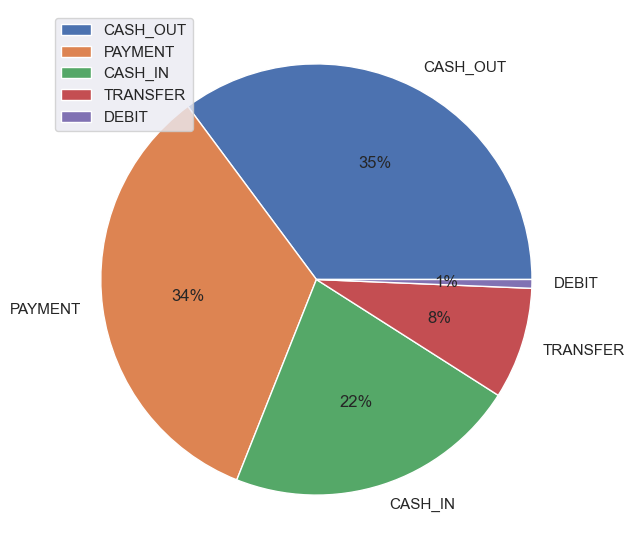

In [13]:
#Now we will see the Proportion of type of Transactions

type = df['type'].value_counts()
transaction = type.index
count = type.values

# drawing piechart
plt.figure(figsize=(7,7))
plt.pie(count, labels=transaction, autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.show()

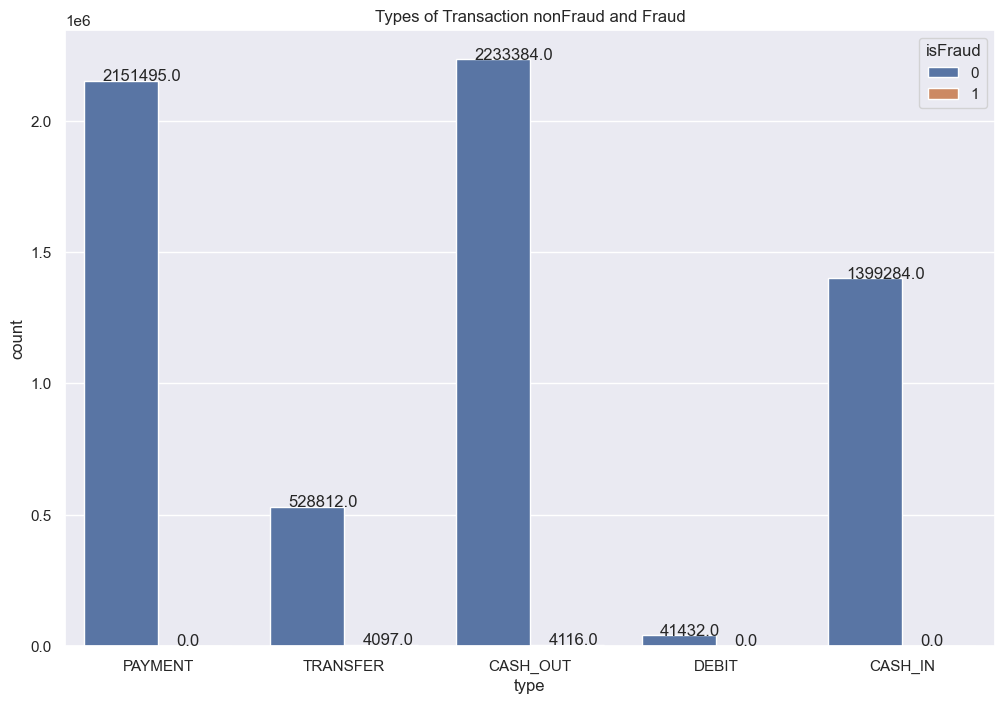

In [14]:
#Now let's see the Count of Fraud and Non-Fraud Transactions in each type of Transaction
plt.figure(figsize=(12,8))
ax=sns.countplot(x = "type", hue="isFraud", data = df)
plt.title('Types of Transaction nonFraud and Fraud')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Here we can observe that:
1. Transaction types TRANSFER and CASH_OUT only have fraud Transactions.
2. DEBIT Transactions are only few and TRANSFER type Transactions are also less compared to other type of transactions.
3. No.of fraud transactions of TRANSFER type are very close to No. of CASH_OUT fraud transactions. Probably most of the fraud transactions is by transferring funds to a specific account and then CASHING OUT from those accounts. We will check this further.

In [15]:
df_1=df[(df['isFraud']==1) & (df['type']=='TRANSFER')]
df_1['nameDest'].value_counts()

nameDest
C553264065     1
C988859148     1
C1287650869    1
C922180689     1
C131895413     1
              ..
C776246900     1
C1234144009    1
C571016162     1
C1381364691    1
C2080388513    1
Name: count, Length: 4097, dtype: int64

In [16]:
df_2=df[(df['isFraud']==1) & (df['type']=='CASH_OUT')]
df_2['nameOrig'].value_counts()

nameOrig
C840083671     1
C1055498407    1
C1886113938    1
C520336445     1
C463684846     1
              ..
C1641368956    1
C2120940829    1
C992121519     1
C1663597987    1
C1280323807    1
Name: count, Length: 4116, dtype: int64

Here we can see that there are no specific accounts from which fraud transactions are carried out.So these account name features are not useful for us in modelling.
Let's check futhermore.

In [17]:
fraud = df[df["isFraud"] == 1]
valid = df[df["isFraud"] == 0]

In [18]:
fraud_transfer = fraud[fraud["type"] == "TRANSFER"]
fraud_cashout = fraud[fraud["type"] == "CASH_OUT"]

# checking if the recipient account of a fraud transfer was used as a sending account for cashing out 
fraud_transfer.nameDest.isin(fraud_cashout.nameOrig).any()

False

For fraudulent transactions, the account that received funds during a transfer was not used at all for cashing out.

Now we will create a categorical variable with levels "CC" (Customer to Customer), "CM" (Customer to Merchant), "MC" (Merchant to Customer), "MM" (Merchant to Merchant).

In [7]:
# adding feature type1

# creating copy of dataset in case I need original dataset
data_new = df.copy()
# Now initializing the feature column
data_new["Type2"] = np.nan 

# filling feature column
data_new.loc[df.nameOrig.str.contains('C') & df.nameDest.str.contains('C'),"Type2"] = "CC" 
data_new.loc[df.nameOrig.str.contains('C') & df.nameDest.str.contains('M'),"Type2"] = "CM"
data_new.loc[df.nameOrig.str.contains('M') & df.nameDest.str.contains('C'),"Type2"] = "MC"
data_new.loc[df.nameOrig.str.contains('M') & df.nameDest.str.contains('M'),"Type2"] = "MM"

In [8]:
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Type2
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,CM
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,CM
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,CC
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,CC
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,CM


Now let's Plot some Pairplot

Now Visualizing Numeric variables against Fraud using Boxplots.

Text(0.5, 1.0, 'oldbalanceDest vs Fraud')

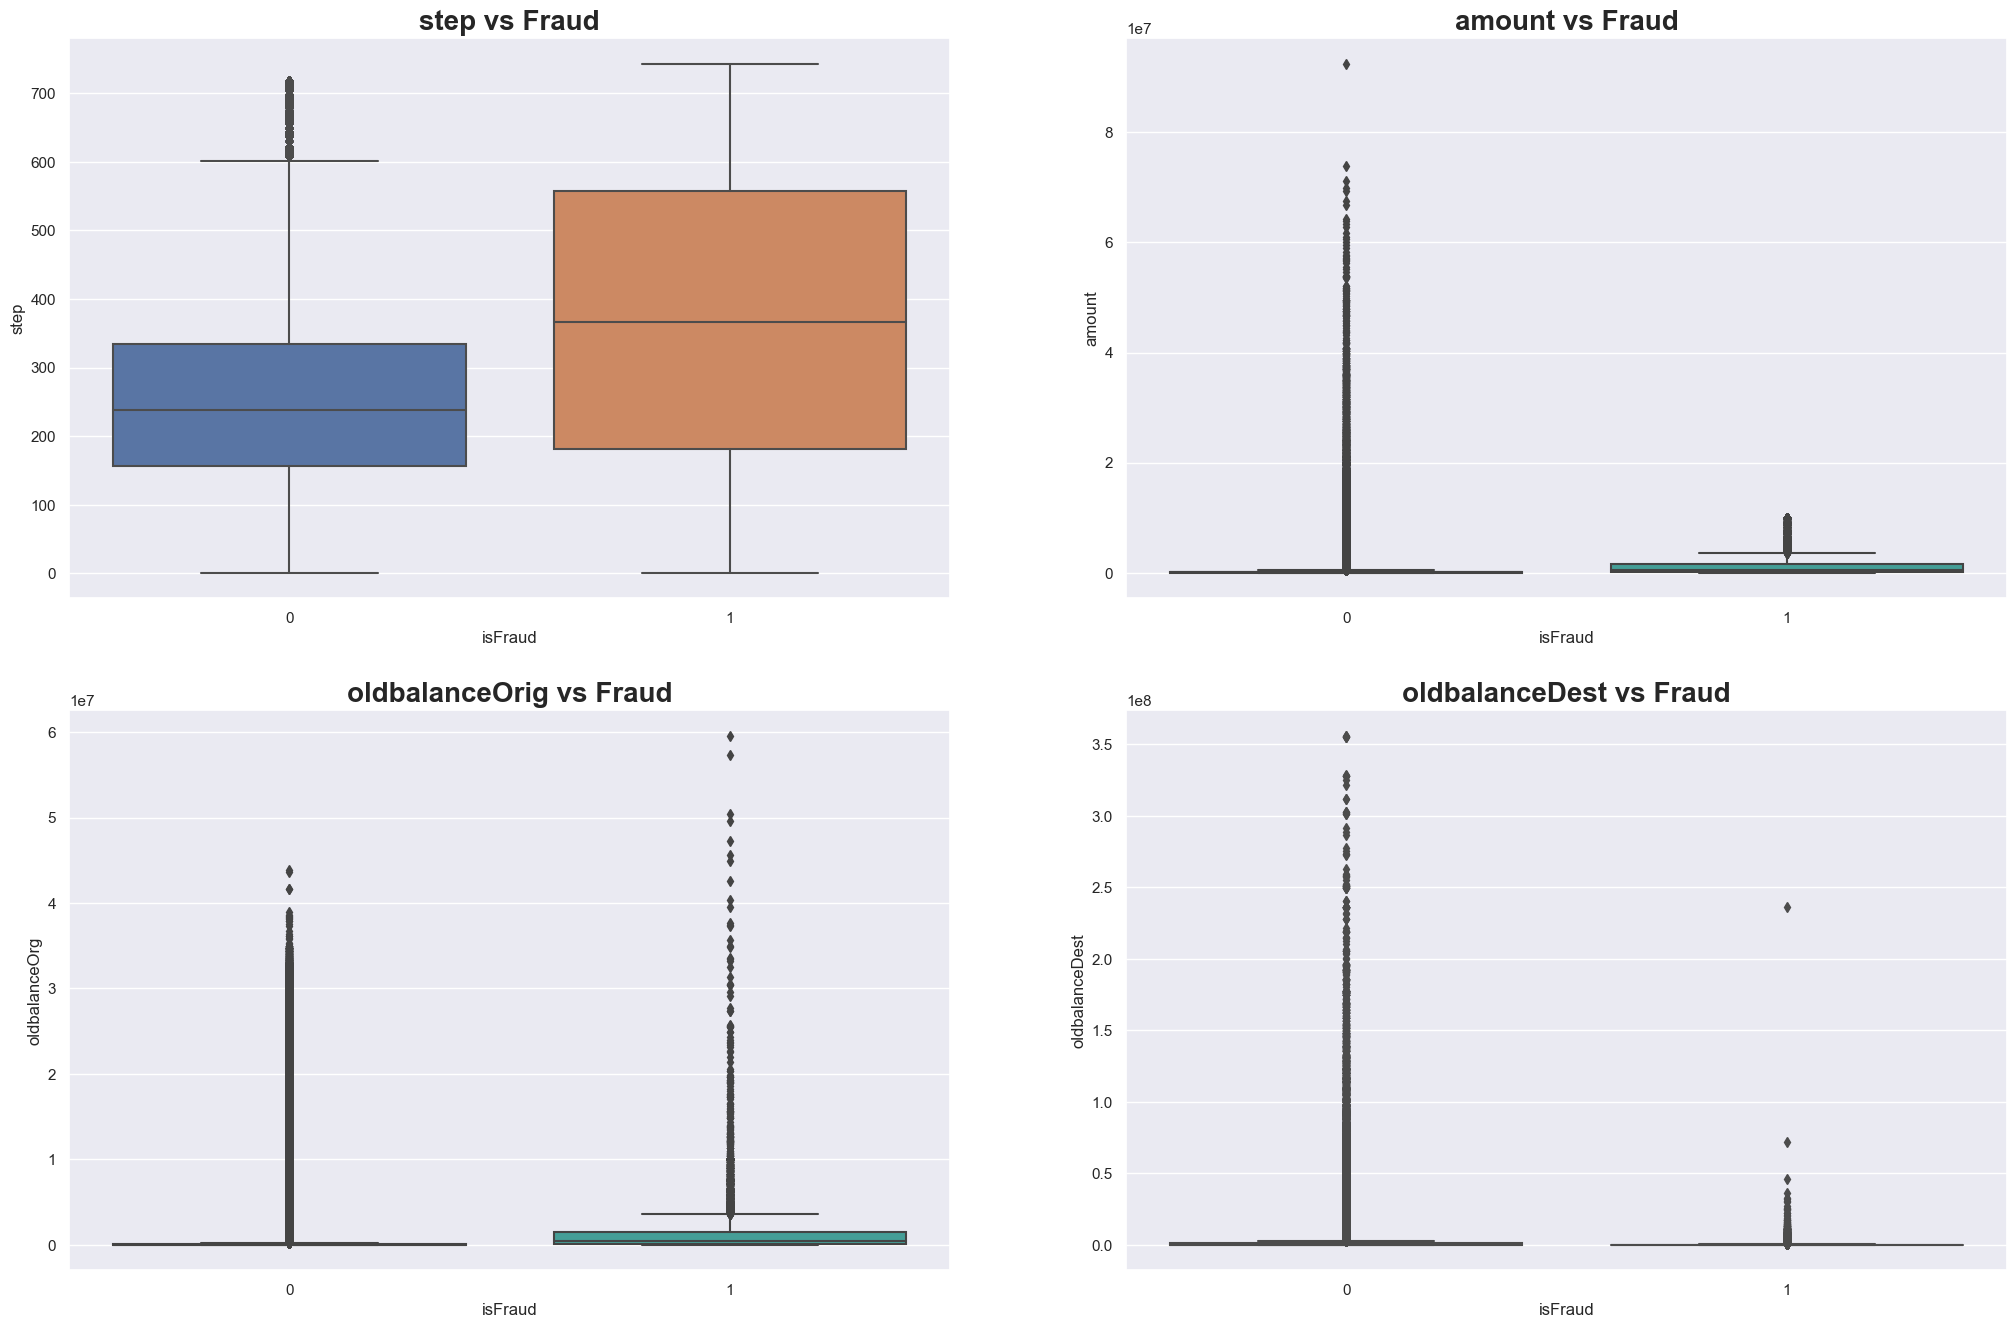

In [21]:
plt.figure(figsize=(25, 16))
plt.subplot(2,2,1)
sns.boxplot(x = 'isFraud', y = 'step', data = data_new)
plt.title('step vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,2)
sns.boxplot(x = 'isFraud', y = 'amount', data = data_new,palette="husl")
plt.title('amount vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,3)
sns.boxplot(x = 'isFraud', y = 'oldbalanceOrg', data = data_new, palette= 'husl')
plt.title('oldbalanceOrig vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,4)
sns.boxplot(x = 'isFraud', y = 'oldbalanceDest', data = data_new,palette="bright")
plt.title('oldbalanceDest vs Fraud',fontweight="bold", size=20)

1. Median amount for fraud transactions is greater than Non Fraud transactions.
2. We can also see that, balance in Origin account in Fraud transactions before transaction is greater than Balance in Origin account of Non Fraud transactions.

In [22]:
fraud = data_new[data_new["isFraud"] == 1]
valid = data_new[data_new["isFraud"] == 0]

In [23]:
print("Fraud transactions by type1: \n",fraud.Type2.value_counts())
print("\n Valid transactions by type1: \n",valid.Type2.value_counts())

Fraud transactions by type1: 
 Type2
CC    8213
Name: count, dtype: int64

 Valid transactions by type1: 
 Type2
CC    4202912
CM    2151495
Name: count, dtype: int64


Here from the dataset, it seems that fraud transactions only occur when the transaction type1 is CC (Customer to Customer).

Now let us see what the patterns look like over any particular day of the week.

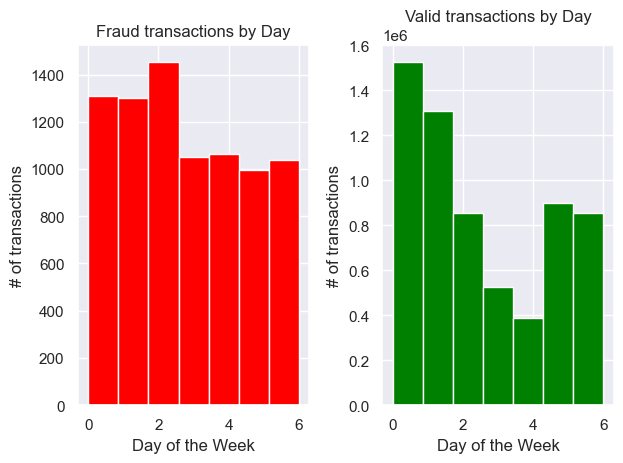

In [24]:
num_days = 7
num_hours = 24
fraud_days = (fraud.step//num_hours)% num_days
fraud_hours = fraud.step % num_hours
valid_days = (valid.step//num_hours) % num_days
valid_hours = valid.step % num_hours

# plotting scatterplot of the days of the week, identifying the fraud transactions (red) from the valid transactions (green) 
plt.subplot(1, 2, 1)
fraud_days.hist(bins=num_days,color="red")
plt.title('Fraud transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.subplot(1,2,2)
valid_days.hist(bins=num_days,color="green")
plt.title('Valid transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

From the graphs above, we can see that there is little information to suggest that fraud transactions take place at particular days of the week.
While valid transactions occur less on some two consecutive days of the week.

Now we will drop the columns that are not needed for our modelling. These are isFlaggedFraud, nameOrig, nameDest columns.

In [30]:
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Type2
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,CM
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,CM
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,CC
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,CC
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,CM


In [9]:
#Dropping columns that are not needed
data_new = data_new.drop(["isFlaggedFraud","nameOrig","nameDest"],axis=1)

In [10]:
data_new.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,Type2
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,CM
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,CM
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,CC
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,CC
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,CM


Now we will handle categorical variables.

In [11]:
data_new = pd.get_dummies(data_new,prefix=['type','Type2'],drop_first=True)

# Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split
X = data_new.drop("isFraud",axis=1)
y = data_new["isFraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Scaling the data so that all variables follow the same scale (0 to 1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit only to the training data
X_train=scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# Performing Undersampling of Train Data

1. We undersample training data as when we trained classifiers with entire training data all classifiers except RandomForest Classifier, classified all points as non-Fraud and failed to detect any Fraud transaction.
2. As this training data is in tens of lakhs so models will still learn train data well as the undersampled data will still contain enough number of transactions.

In [13]:
import sklearn
import imblearn

In [14]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.2)

In [15]:
X_res, y_res = rus.fit_resample(X_train, y_train)

# Model Selection

1. Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_res,y_res)

LogisticRegression()

In [18]:
#Accuracy score for test data
from sklearn.metrics import accuracy_score
y_pred = logmodel.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 97.40327097956502 %


In [19]:
#Accuracy score for train data
from sklearn.metrics import accuracy_score
y_pred = logmodel.predict(X_res)
print("Accuracy Score :", accuracy_score(y_res, y_pred)*100, "%")

Accuracy Score : 89.44991789819376 %


In [20]:
#Classification report for logistic regression model
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99   1588532
           1       0.03      0.50      0.05      2123

    accuracy                           0.97   1590655
   macro avg       0.51      0.74      0.52   1590655
weighted avg       1.00      0.97      0.99   1590655



2. RandomForestClassifier

A random forest is an algorithm that generates several decisions trees and pools the results of each tree to make a more strong prediction.

Another great thing about Random Forest is that we can assign weights to each class to reduced the bias of the model towards the majority class.

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_res, y_res)

In [22]:
#Accuracy score for test data
y_pred = rfc.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 99.6119837425463 %


In [23]:
#Accuracy score for train data
y_pred = rfc.predict(X_res)
print("Accuracy Score :", accuracy_score(y_res, y_pred)*100, "%")

Accuracy Score : 100.0 %


In [24]:
#Classification report for RandomForest Classifier model
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588532
           1       0.25      0.98      0.40      2123

    accuracy                           1.00   1590655
   macro avg       0.63      0.99      0.70   1590655
weighted avg       1.00      1.00      1.00   1590655



# Observations and Conclusion

1. When we compare confusion matrices of all the classifiers we observe that RandomForest Classifier does a very good work detecting Fraud Transactions leaving only around 3% of Fraud transactions from Test data undetected and when checked on Train data it leaves 0.05% Fraud transactions undetected.
2. RandomForest does misclassify some nonFraud transactions as Fraud but it is less than 0.5% of all non Fraud transactions which is fine if less than 0.5% of nonFraud transactions fail in an attempt to detect 97% Fraud transactions.

From the above observations we can see that RandomForest Classifier performs best in detecting Fraud Transactions.

In [25]:
# Classification Report and Confusion Matrix of RandomForest Classifier model
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588532
           1       0.25      0.98      0.40      2123

    accuracy                           1.00   1590655
   macro avg       0.63      0.99      0.70   1590655
weighted avg       1.00      1.00      1.00   1590655



Text(0.5, 1.0, 'Accuracy Score: 0.9961198374254631')

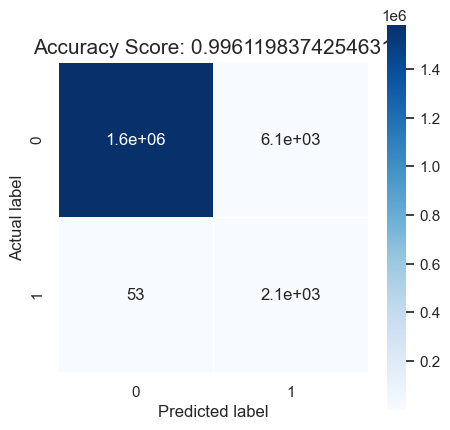

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)